# Use the iris database to answer the following questions:

In [150]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
import pydataset

In [151]:
df_iris = pydataset.data("iris")

What does the distribution of petal lengths look like?


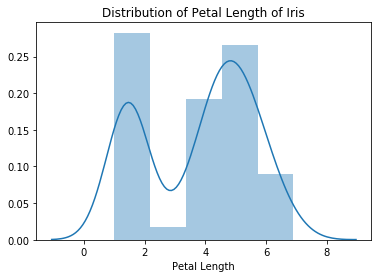

In [152]:
# 1. What does the distribution of petal lengths look like?
print("What does the distribution of petal lengths look like?")
sns.distplot(df_iris["Petal.Length"])
plt.title("Distribution of Petal Length of Iris")
plt.xlabel("Petal Length")
plt.show()
print()

Is there a correlation between petal length and petal width?
Correlation coefficient:
              Petal.Length  Petal.Width
Petal.Length      1.000000     0.962865
Petal.Width       0.962865     1.000000
              Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000


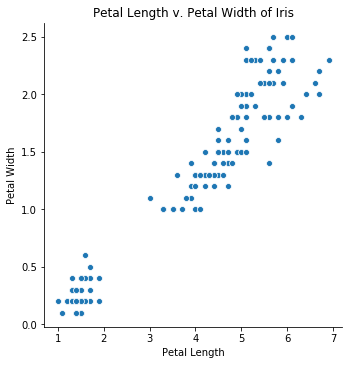

In [153]:
# 2. Is there a correlation between petal length and petal width? Yes, very high.
print("Is there a correlation between petal length and petal width?")
print("Correlation coefficient:")
print(df_iris[["Petal.Length", "Petal.Width"]].corr())
sns.relplot(data=df_iris, x="Petal.Length", y="Petal.Width")
plt.title("Petal Length v. Petal Width of Iris")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
print(df_iris.corr())
plt.show()


print()

Would it be reasonable to predict species based on sepal width and sepal length?


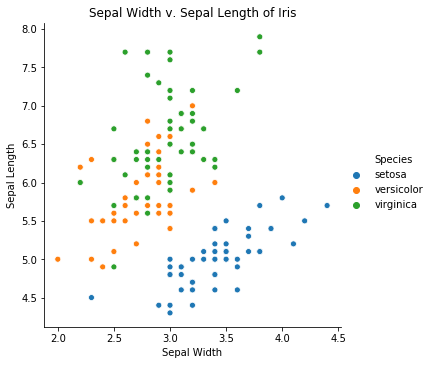

In [154]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
# Yes for setosa, but for versicolor and virginica, there would be more misclassifications
print("Would it be reasonable to predict species based on sepal width and sepal length?")
sns.relplot(data=df_iris, x="Sepal.Width", y="Sepal.Length", hue="Species")
plt.title("Sepal Width v. Sepal Length of Iris")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()
print()

Which features would be best used to predict species?


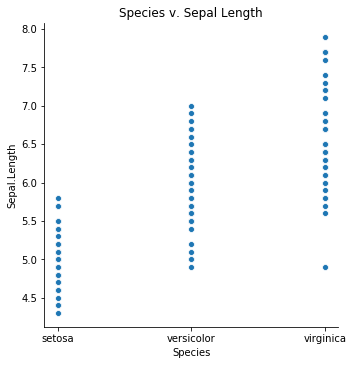

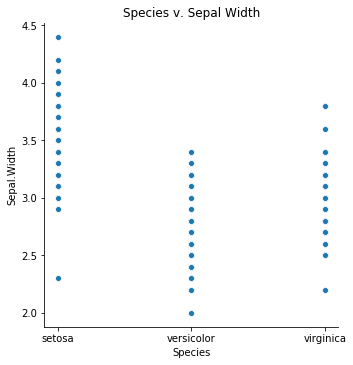

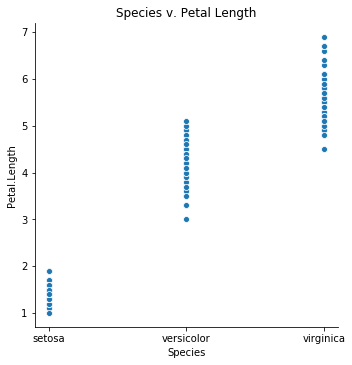

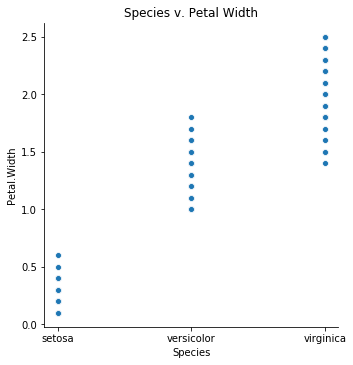

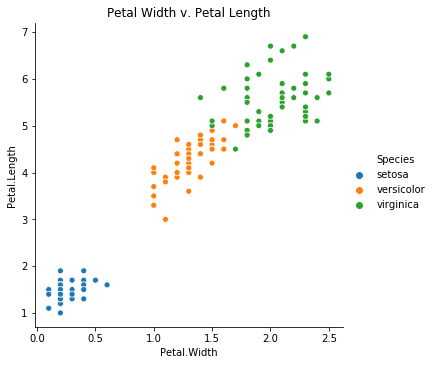

In [155]:
# 4. Which features would be best used to predict species?
# Petal Width and Petal Length
print("Which features would be best used to predict species?")

sns.relplot(data=df_iris, x="Species", y="Sepal.Length")
plt.title("Species v. Sepal Length")
plt.show()

sns.relplot(data=df_iris, x="Species", y="Sepal.Width")
plt.title("Species v. Sepal Width")
plt.show()

sns.relplot(data=df_iris, x="Species", y="Petal.Length")
plt.title("Species v. Petal Length")
plt.show()

sns.relplot(data=df_iris, x="Species", y="Petal.Width")
plt.title("Species v. Petal Width")
plt.show()

sns.relplot(data=df_iris, x="Petal.Width", y="Petal.Length", hue="Species")
plt.title("Petal Width v. Petal Length")
plt.show()

print()

In [156]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
# What do you notice?
# The mean and standard deviation for both x and y values for the datasets are similar
# But the min and max are not. The quartiles are close by, but do differ significantly sometimes.

df_anscombe = sns.load_dataset('anscombe')
print(df_anscombe.groupby("dataset").describe().transpose())

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000


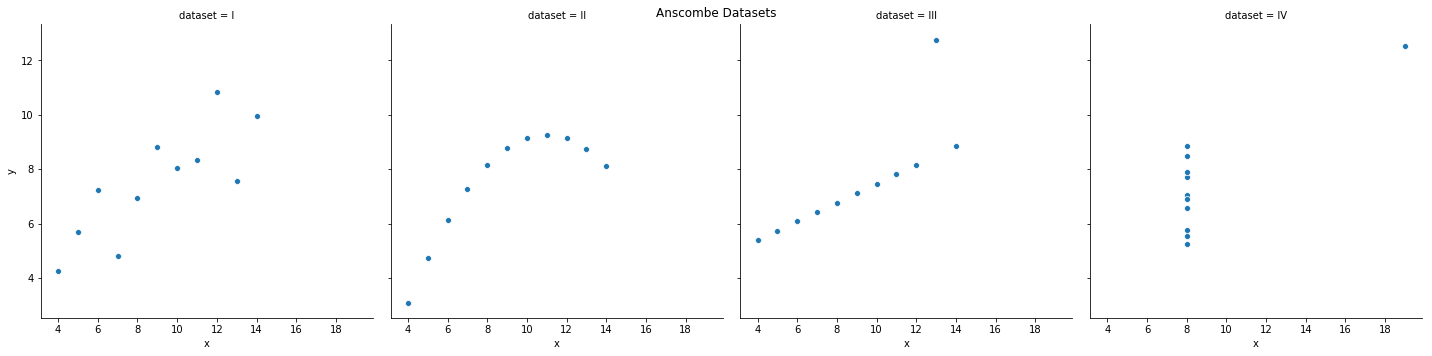

In [157]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(data=df_anscombe, x="x", y="y", col="dataset")
plt.suptitle("Anscombe Datasets")
plt.show()

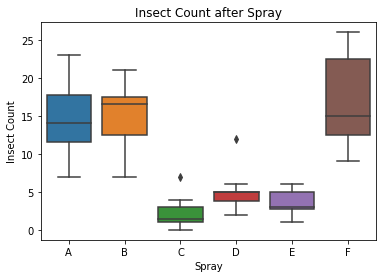

In [158]:
# Load the InsectSprays dataset and read it's documentation.
# Create a boxplot that shows the effectiveness of the different insect sprays.
df_insect_sprays = pydataset.data("InsectSprays")
sns.boxplot(data=df_insect_sprays, x="spray", y="count")
plt.title("Insect Count after Spray")
plt.xlabel("Spray")
plt.ylabel("Insect Count")
plt.show()

In [159]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
df_swiss = pydataset.data("swiss")

In [160]:
# Create a column named is_catholic that holds a boolean value of whether or not the
# province is Catholic. (Choose a cutoff point for what constitutes catholic)
series_is_catholic = df_swiss.Catholic > 50 
df_swiss_is_catholic = df_swiss.assign(is_catholic=series_is_catholic)

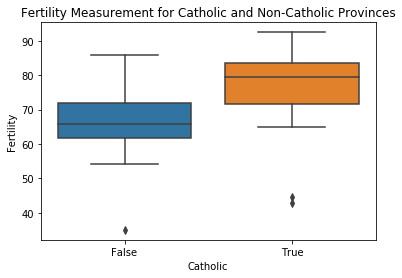

In [161]:
# Does whether or not a province is Catholic influence fertility?
# Not sure whether it influences fertility, but it does appear that provinces classified
# as Catholic do have a higher fertility measurement than those that are not.
sns.boxplot(data=df_swiss_is_catholic, x="is_catholic", y="Fertility")
plt.title("Fertility Measurement for Catholic and Non-Catholic Provinces")
plt.xlabel("Catholic")
plt.show()

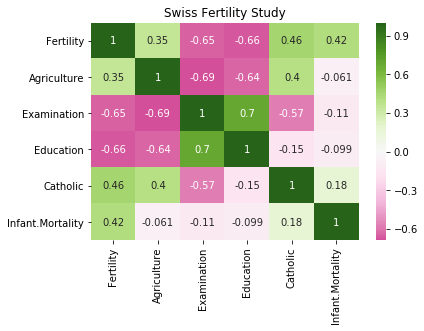

In [162]:
# What measure correlates most strongly with fertility?
# Education, closely followed by Examination. Both are negative correlations

sns.heatmap(df_swiss.corr(), cmap=cm.PiYG, annot=True, center=0)
plt.title("Swiss Fertility Study")
plt.show()

In [163]:
# Using the chipotle dataset from the previous exercise,
from env import host, user, password
from sqlalchemy import create_engine

def get_db_url(hostname: str, username: str, password: str, db_name: str) -> str:
    return f"mysql+pymysql://{username}:{password}@{hostname}/{db_name}"

db_chipotle = "chipotle"
conn = create_engine(get_db_url(host, user, password, db_chipotle))

chipotle_query = """
SELECT *
FROM orders;
"""
df_chipotle = pd.read_sql(chipotle_query, conn)

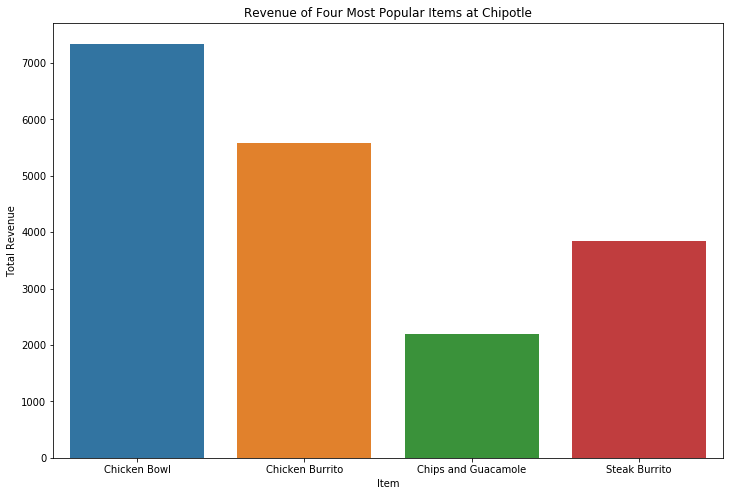

In [164]:
# create a barplot that shows the 4 most popular items and the revenue produced by each.
chipotle_float_price = df_chipotle.item_price.str.replace("$", "").replace(",", "")
df_chipotle_float_price = df_chipotle.assign(float_price=pd.to_numeric(chipotle_float_price))

df_quantity_by_item = df_chipotle_float_price.groupby(by="item_name", as_index=False).agg({"quantity": "sum", "float_price": "sum"})
df_quantity_items_sold = df_quantity_by_item.nlargest(4, "quantity")
plt.figure(figsize=(12, 8))
sns.barplot(data=df_quantity_items_sold, x="item_name", y="float_price")
plt.title("Revenue of Four Most Popular Items at Chipotle")
plt.xlabel("Item")
plt.ylabel("Total Revenue")
plt.show()
# print(df_quantity_items_sold)

In [165]:
# Load the sleepstudy data and read it's documentation.
df_sleepstudy = pydataset.data("sleepstudy")

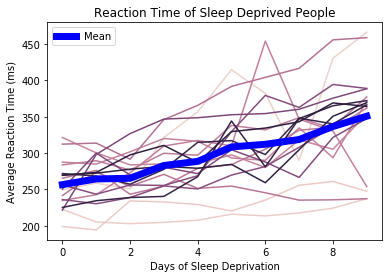

In [166]:
# Use seaborn to create a line plot of all the individual subject's reaction times and a more
# prominant line showing the average change in reaction time.
# df_sleepstudy.groupby(by="Days").sum()

sns.lineplot(data=df_sleepstudy, x="Days", y="Reaction", hue="Subject", legend=False)
sns.lineplot(data=df_sleepstudy, x="Days", y="Reaction", ci=None, linewidth=7, color="blue", label="Mean")
plt.legend()
plt.title("Reaction Time of Sleep Deprived People")
plt.xlabel("Days of Sleep Deprivation")
plt.ylabel("Average Reaction Time (ms)")
plt.show()